# 서울시 지하철호선별 역별 승하차 인원 정보

총 19139 건의 데이터

#### 주요 변수
- 사용일자: 지하철 사용일자
- 노선명: 지하철 노선명
- 역명: 지하철역 이름 
- 승차총승객수: 해당 역의 승차 인원 수
- 하차총승객수: 해당 역의 하차 인원 수
- 등록일자: 데이터 등록일

요일별 이용패턴, 혼잡도 분석

사용일자, 등록일자 datetime으로 형식 변환

In [16]:
# 데이터 불러오기
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/CARD_SUBWAY_MONTH_202505.csv", index_col=False)

# 기본 정보 확인
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19139 entries, 0 to 19138
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    19139 non-null  int64 
 1   노선명     19139 non-null  object
 2   역명      19139 non-null  object
 3   승차총승객수  19139 non-null  int64 
 4   하차총승객수  19139 non-null  int64 
 5   등록일자    19139 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 897.3+ KB


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20250501,분당선,야탑,17571,18765,20250504
1,20250501,8호선,석촌,6970,8042,20250504
2,20250501,분당선,서현,16548,17173,20250504
3,20250501,경부선,독산,8851,8507,20250504
4,20250501,경부선,수원,35103,38426,20250504


In [23]:
# 한글폰트 검색
# 폰트 굴림체 있는지 확인
import matplotlib.font_manager as fm
for i in fm.fontManager.ttflist:
    if i.name.find('Gulim') != -1 :
        print(i.name)
        
# 폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

New Gulim
Gulim


In [17]:
df['사용일자'] = pd.to_datetime(df['사용일자'], format='%Y%m%d')
df['등록일자'] = pd.to_datetime(df['등록일자'], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19139 entries, 0 to 19138
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    19139 non-null  datetime64[ns]
 1   노선명     19139 non-null  object        
 2   역명      19139 non-null  object        
 3   승차총승객수  19139 non-null  int64         
 4   하차총승객수  19139 non-null  int64         
 5   등록일자    19139 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 897.3+ KB


In [18]:
#'요일' 정보 추가
df['요일'] = df['사용일자'].dt.day_name()

In [19]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
0,2025-05-01,분당선,야탑,17571,18765,2025-05-04,Thursday
1,2025-05-01,8호선,석촌,6970,8042,2025-05-04,Thursday
2,2025-05-01,분당선,서현,16548,17173,2025-05-04,Thursday
3,2025-05-01,경부선,독산,8851,8507,2025-05-04,Thursday
4,2025-05-01,경부선,수원,35103,38426,2025-05-04,Thursday


In [20]:
# 총 이용객 수 계산
df['총이용객수'] = df['승차총승객수'] + df['하차총승객수']

In [46]:
#  요일별 평균 이용객 수
day_mean = df.groupby('요일')[['승차총승객수', '하차총승객수', '총이용객수']].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
day_mean

,승차총승객수,하차총승객수,총이용객수
요일,,,
Monday,11679.029567,11632.236938,23311.266505
Tuesday,11853.465399,11806.054229,23659.519628
Wednesday,13383.697608,13334.464532,26718.162140
Thursday,12387.085816,12336.437824,24723.523640
Friday,13474.597604,13418.982519,26893.580123
Saturday,9891.028146,9837.277904,19728.306050
Sunday,8141.642451,8092.712256,16234.354708


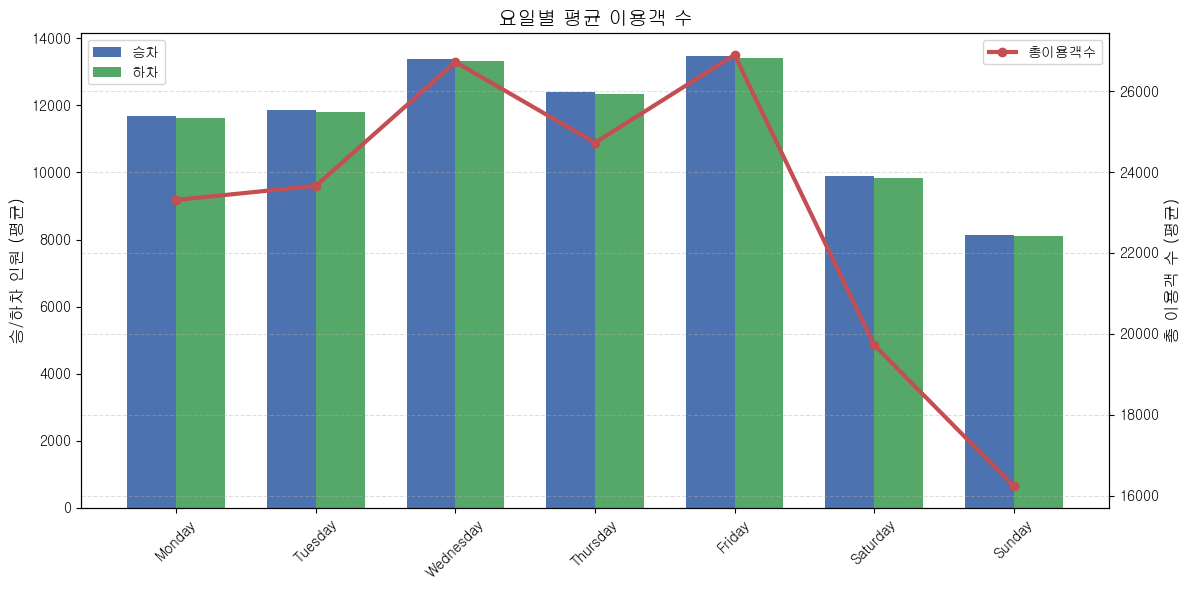

In [47]:
# 요일별 평균 이용객 수
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(x - width/2, day_mean['승차총승객수'], width, label='승차', color='#4C72B0')
ax1.bar(x + width/2, day_mean['하차총승객수'], width, label='하차', color='#55A868')
ax1.set_ylabel('승/하차 인원 (평균)', fontsize=12)
ax1.set_title('요일별 평균 이용객 수', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(day_mean.index, rotation=45)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(x, day_mean['총이용객수'], label='총이용객수', color='#C44E52', marker='o', linewidth=3)
ax2.set_ylabel('총 이용객 수 (평균)', fontsize=12)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

요일별 승하차 평균 이용객 수를 봤을 때 수요일과 금요일이 높은 것을 볼 수 있다.
주말에는 승하차 평균 이용객 수가 평일에 비해 많이 감소한 것을 볼 수 있다.

In [48]:
# 노선별 총합 계산
line_sum = df.groupby('노선명')[['승차총승객수', '하차총승객수', '총이용객수']].sum().sort_values(by='총이용객수', ascending=False)
line_sum.head()

,승차총승객수,하차총승객수,총이용객수
노선명,,,
2호선,43002375,43682734,86685109
5호선,20190075,19936696,40126771
7호선,18100928,17784676,35885604
3호선,16571902,16450075,33021977
4호선,16271065,16650853,32921918


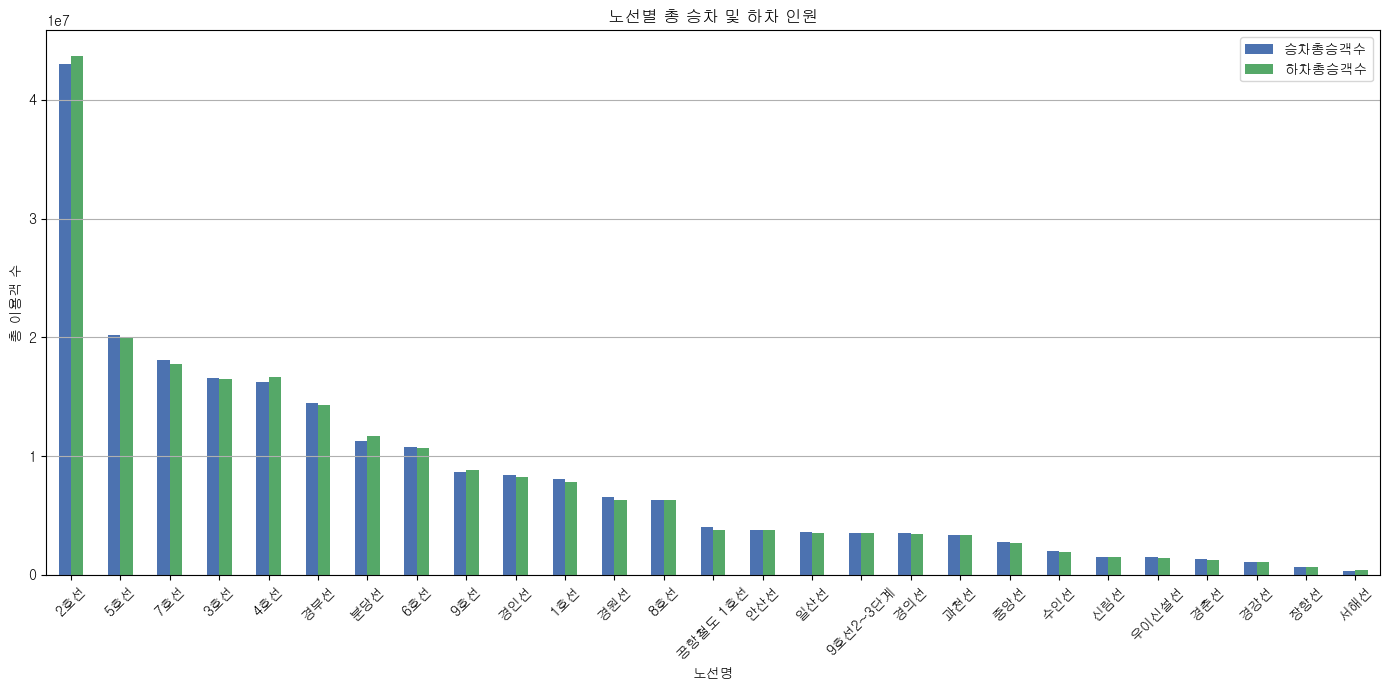

In [50]:
# 시각화
line_sum[['승차총승객수', '하차총승객수']].plot(kind='bar', figsize=(14,7), color=['#4C72B0', '#55A868'])
plt.title('노선별 총 승차 및 하차 인원')
plt.ylabel('총 이용객 수')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

모든 노선의 총 승차 하차 인원을 살펴본 결과 2호선의 이용자가 가장 높은 것을 볼 수 있다.

In [59]:
# 2호선
df_2 = df[df['노선명'] == '2호선'].copy()
df_2


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,총이용객수
132,2025-05-01,2호선,시청,15518,14123,2025-05-04,Thursday,29641
133,2025-05-01,2호선,을지로입구,33056,32450,2025-05-04,Thursday,65506
134,2025-05-01,2호선,을지로3가,15218,13686,2025-05-04,Thursday,28904
135,2025-05-01,2호선,을지로4가,10433,10642,2025-05-04,Thursday,21075
136,2025-05-01,2호선,동대문역사문화공원(DDP),14208,16725,2025-05-04,Thursday,30933
...,...,...,...,...,...,...,...,...
18758,2025-05-31,2호선,동대문역사문화공원(DDP),14650,17255,2025-06-03,Saturday,31905
18759,2025-05-31,2호선,을지로4가,11518,11813,2025-06-03,Saturday,23331
18760,2025-05-31,2호선,을지로3가,17649,17523,2025-06-03,Saturday,35172
18761,2025-05-31,2호선,을지로입구,36161,36307,2025-06-03,Saturday,72468


In [63]:
# 역별 총 이용객수 합계, 상위 역
station_sum = df_2.groupby('역명')[['승차총승객수', '하차총승객수','총이용객수']].sum()

top_station = station_sum.sort_values(by='총이용객수', ascending=False).iloc[0]
top_station_name = station_sum.sort_values(by='총이용객수', ascending=False).index[0]

In [64]:
# 해당 역 승,하차 비율
승차비율 = top_station['승차총승객수'] / top_station['총이용객수'] * 100
하차비율 = top_station['하차총승객수'] / top_station['총이용객수'] * 100

print(f"2호선에서 가장 이용객이 많은 역은 '{top_station_name}'입니다.")
print(f"총 이용객수: {top_station['총이용객수']:,}명")
print(f"승차 비율: {승차비율:.2f}%")
print(f"하차 비율: {하차비율:.2f}%")

2호선에서 가장 이용객이 많은 역은 '잠실(송파구청)'입니다.
총 이용객수: 5,072,739명
승차 비율: 50.42%
하차 비율: 49.58%


- 2호선에서 가장 혼잡한 역은 507만 명의 이용객이 이용하는 잠실(송파구청)역이다.
- 상차, 하차만 한 쪽으로 몰리지 않고 균형 있게 유입과 유출이 이루어지는 구조이다.